# Задача 1: закон тангенса в гравитационном поле

## Импорт библиотек

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import quad
from matplotlib import pyplot as plt
from math import *

## Функции

In [30]:
def control(t, tg_theta, c): # Закон тангенса
    return atan(tg_theta - c * t)

def f(t, X, param):
    (tg_theta, c) = param
    (x, y, vx, vy) = X
    u = control(t, tg_theta, c)
    return np.array((vx, vy, a*cos(u), a*sin(u)-g))

def f_der(X):
    y = a * quad(lambda t: cos(control(t)), t0, T)[0]
    J = -a * quad(lambda t: sin(control(t))/(1 + tan(control(t))**2), t0, T)[0]
    J2 = a * quad(lambda t: t * sin(control(t))/(1 + tan(control(t))**2), t0, T)[0]
    der = np.array([J, J2]) * 2 * (y - h)
    return der

def r(param): # Функция невязки
    tg_theta = param[0]
    c = param[1]
    def f_int(t, X):
        return f(t, X, param)
    Y = solve_ivp(f_int, [t0, T], [0, 0, 0, 0], method='RK45', atol=1e-9, rtol=1e-9)
    y = Y.y[1,-1]
    vx = Y.y[2,-1]
    vy = Y.y[3,-1]
    return (y - h)**2 + vy**2

## Параметры

In [31]:
h = 300000 # Целевая высота, км 
m = 44413 # Масса ракеты, кг
a = 104 * 9806.65 / m # Удельная сила тяги, м/с^2
g = 9.80665 # Ускорение свободного падения, м/с^2

## Начальные данные

In [35]:
X0 = np.array([0, 0, 0, 0]) # Начальные фазовые переменные
t0 = 0 # Начальное время, с
T = 1000 # Конечное время, с

theta = np.deg2rad(41.2)
tg_theta = tan(theta)
c = 0.001

## Решение

In [36]:
#Оптимизация
res = minimize(r, [tg_theta, c], method='nelder-mead', jac=f_der,
              options={'xatol': 1e-12, 'disp': True})
tg_theta = res.x[0]
c = res.x[1]
print(f"Оптимальные параметры: угол = {np.rad2deg(atan(tg_theta))}, c = {c}")

#Решение на экстремуме
Y = solve_ivp(lambda t,x: f(t, x, (tg_theta, c)), [t0, T], X0, method='RK45', atol=1e-9, rtol=1e-9, t_eval=np.linspace(t0, T, 100))
print(f"Конечная высота {Y.y[1,-1]} м, выше целевой на {round(Y.y[1,-1] - h, -4)} м")
res

C:\Users\Public\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method nelder-mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


Оптимальные параметры: угол = 30.146762825436454, c = 0.00021262934845459153
Конечная высота 300000.00000004144 м, выше целевой на 0.0 м


 final_simplex: (array([[5.80770661e-01, 2.12629348e-04],
       [5.80770661e-01, 2.12629348e-04],
       [5.80770661e-01, 2.12629349e-04]]), array([1.89667080e-15, 7.17468085e-15, 1.86359211e-14]))
           fun: 1.8966708023277108e-15
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 401
           nit: 217
        status: 1
       success: False
             x: array([5.80770661e-01, 2.12629348e-04])

## Отрисовка траектории

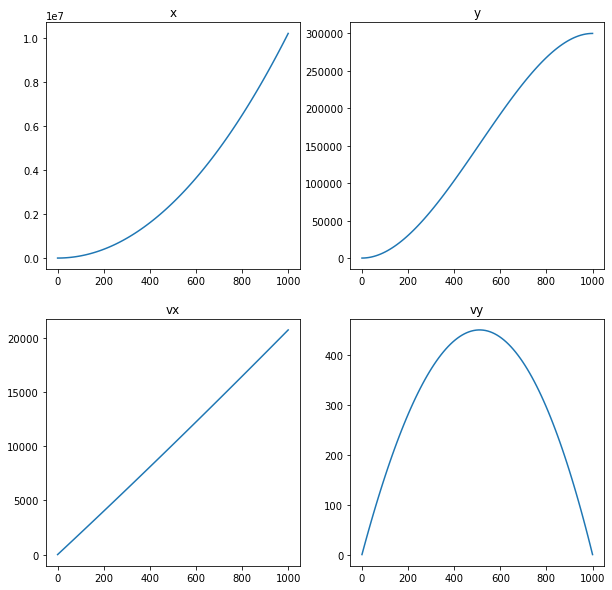

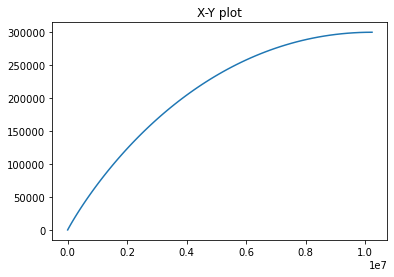

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0][0].plot(Y.t, Y.y[0,:])
ax[0][0].set_title('x')
ax[0][1].plot(Y.t, Y.y[1,:])
ax[0][1].set_title('y')
ax[1][0].plot(Y.t, Y.y[2,:])
ax[1][0].set_title('vx')
ax[1][1].plot(Y.t, Y.y[3,:])
ax[1][1].set_title('vy')
plt.show()

figXY, axXY = plt.subplots()
axXY.plot(Y.y[0,:], Y.y[1,:])
axXY.set_title('X-Y plot')
plt.show()